# Purvita Mandal
# The Sparks Foundation
Data Science and business analyst internship.

Task6: Prediction using Decision Tree Algorithm

Here we will create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn import  tree

In [2]:
#Read the file
df=pd.read_csv("Iris (1).csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no null values here .Hence no missing value is present

We will convert the labels of Species into numbers.

In [7]:
from sklearn.preprocessing import LabelEncoder
le_species=LabelEncoder()
df['Species_label']=le_species.fit_transform(df['Species'])

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.Species_label.unique()

array([0, 1, 2])

Here Iris-setosa is encoded as 0,
Iris-versicolor is encoded as 1 and
Iris-virginica is encoded as 2.

In [15]:
#Dividing into target variable and independent variable
inputs=df.drop(['Id','Species','Species_label'],axis='columns')
target=df['Species_label']
print(inputs)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


# Now we train the classifier

We use Ginni to measure impurity of our tree.

In [25]:
from sklearn import tree
model=tree.DecisionTreeClassifier()#by default criterion is ginni and splitter is best
model.fit(inputs,target)

DecisionTreeClassifier()

# Visualising the Decision tree 

In [18]:
# We have already installed pydotplus and graphviz 

In [19]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

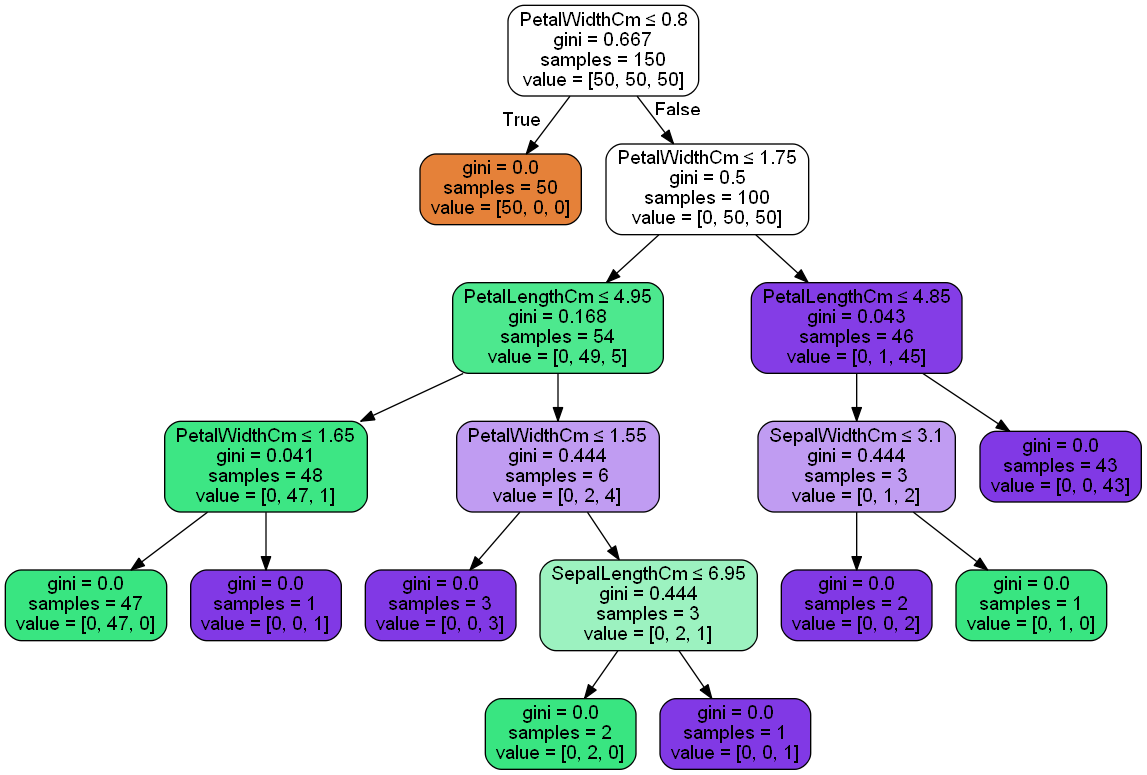

In [26]:
# Visualize the graph
dot_data = StringIO() #Text I/O implementation using an in-memory buffer.
export_graphviz(model, out_file=dot_data, feature_names=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  #Load graph as defined by data in DOT format
Image(graph.create_png())

In [30]:
# The rules of this tree can be explicitly understood
from sklearn.tree.export import export_text
r=export_text(model,feature_names=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'))
print(r)

|--- PetalWidthCm <= 0.80
|   |--- class: 0
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |--- SepalLengthCm <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- SepalLengthCm >  6.95
|   |   |   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: 1
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



In [31]:
model.predict([[5.0,3.6,1.4,0.2]])

array([0])

In [34]:
model.predict([[5.9,3.0,5.1,1.8]])

array([2])

# Thank you